<a href="https://colab.research.google.com/github/SSimmondsR/Churn-Prediction-ML/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service!

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os

# Cambiar el directorio a la carpeta deseada
path = '/content/drive/My Drive/Colab Notebooks/datasets/ChurnNetflixClients'
os.chdir(path)

# Ver los archivos en la carpeta
os.listdir(path)

data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [4]:
# Import required packages

import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import statsmodels.api as sm # Added import statement for statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [6]:
os.listdir(path)
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)


train_df Shape: (243787, 21)


In [7]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)

test_df Shape: (104480, 20)


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [8]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [9]:
## PREPROCESSING


print( test_df.describe())
print(train_df.describe())
print(test_df.isnull().sum())
print(train_df.isnull().sum())

          AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  104480.000000   104480.000000  104480.000000        104480.000000   
mean       60.064692       12.474347     748.167669            20.489914   
std        34.285025        4.331734     520.782838            11.243173   
min         1.000000        4.990051       5.019144             1.000528   
25%        30.000000        8.725621     328.961543            10.767551   
50%        60.000000       12.453073     649.385029            20.472305   
75%        90.000000       16.214247    1081.266991            30.196107   
max       119.000000       19.989797    2376.235183            39.999296   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           104480.000000             104480.000000  104480.000000   
mean                92.646128                 24.450900       3.000958   
std                 50.631406                 14.451309       1.154689   
min                

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


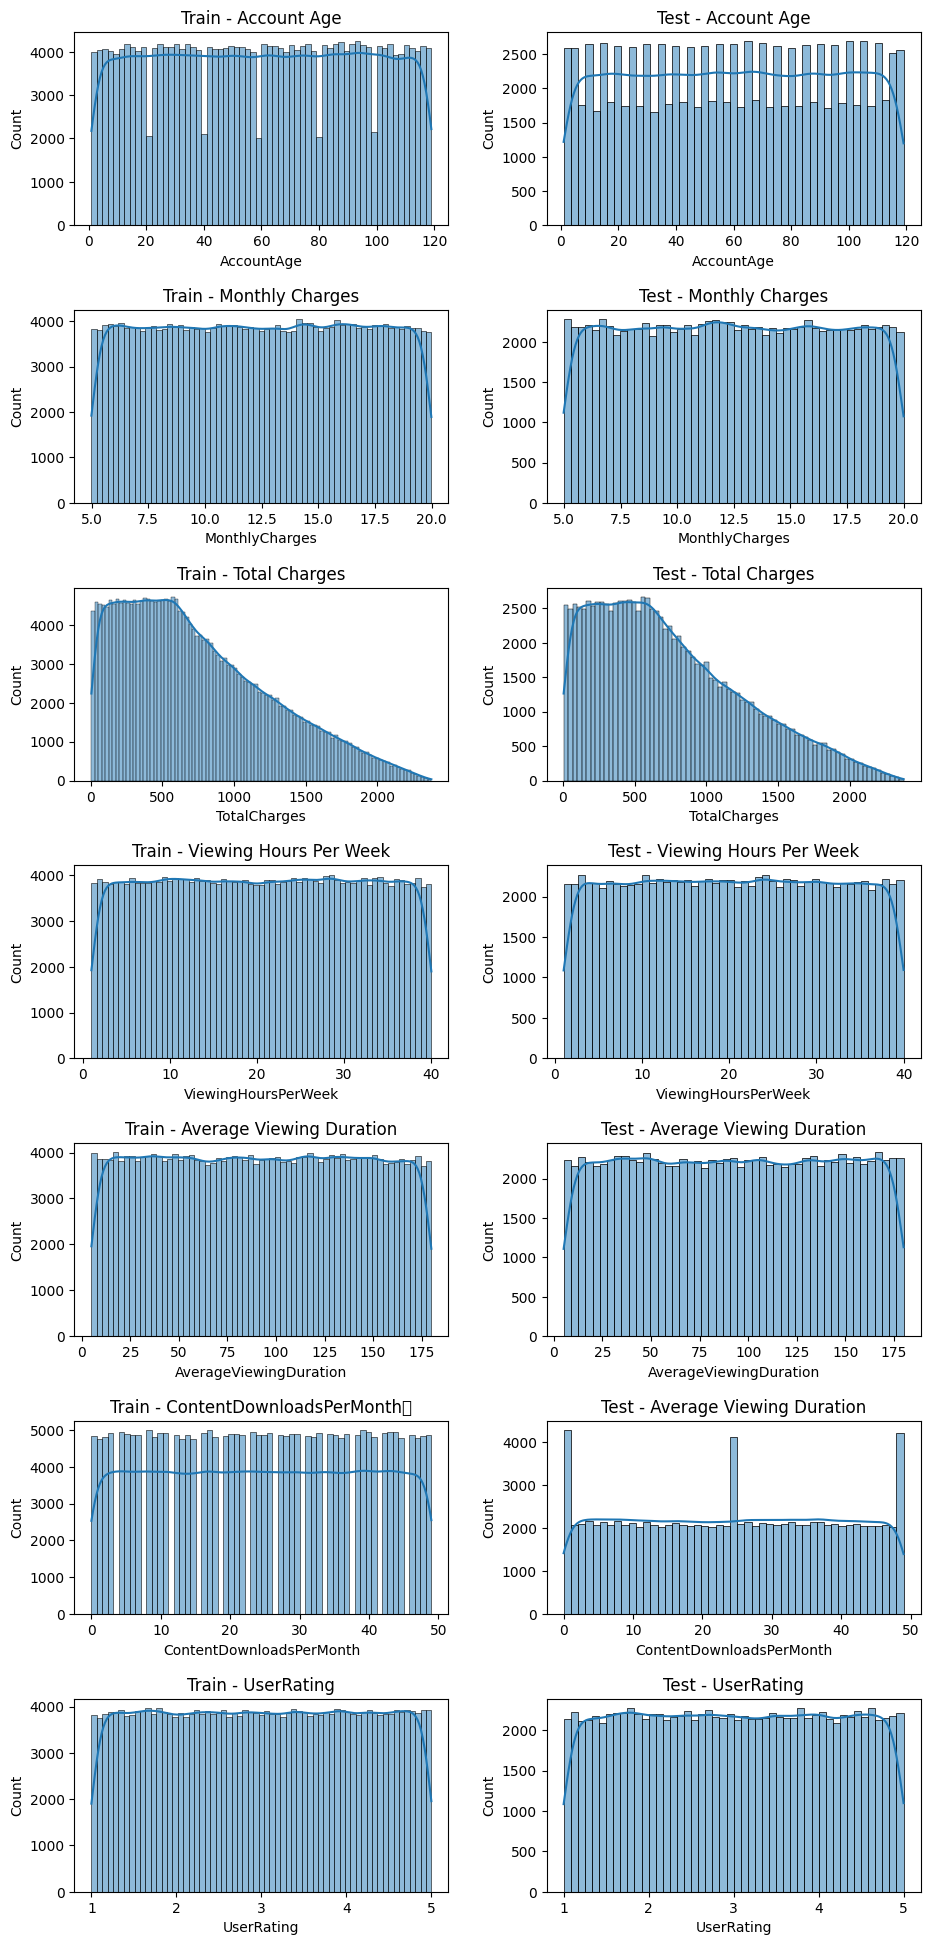

In [10]:
## Visualizando de las diferentes variables en busca de OUTLIERS.

# Crear una figura con 5 filas y 2 columnas
fig, axes = plt.subplots(7, 2, figsize=(10, 20))

# Ajustar el espaciado entre gráficos
plt.tight_layout(pad=4.0)

# Fila 1: Distribución de 'AccountAge'
sns.histplot(train_df['AccountAge'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Train - Account Age')

sns.histplot(test_df['AccountAge'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Test - Account Age')

# Fila 2: Distribución de 'MonthlyCharges'
sns.histplot(train_df['MonthlyCharges'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Train - Monthly Charges')

sns.histplot(test_df['MonthlyCharges'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Test - Monthly Charges')

# Fila 3: Distribución de 'TotalCharges'
sns.histplot(train_df['TotalCharges'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Train - Total Charges')

sns.histplot(test_df['TotalCharges'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Test - Total Charges')

# Fila 4: Distribución de 'ViewingHoursPerWeek'
sns.histplot(train_df['ViewingHoursPerWeek'], ax=axes[3, 0], kde=True)
axes[3, 0].set_title('Train - Viewing Hours Per Week')

sns.histplot(test_df['ViewingHoursPerWeek'], ax=axes[3, 1], kde=True)
axes[3, 1].set_title('Test - Viewing Hours Per Week')

# Fila 5: Distribución de 'AverageViewingDuration'
sns.histplot(train_df['AverageViewingDuration'], ax=axes[4, 0], kde=True)
axes[4, 0].set_title('Train - Average Viewing Duration')

sns.histplot(test_df['AverageViewingDuration'], ax=axes[4, 1], kde=True)
axes[4, 1].set_title('Test - Average Viewing Duration')

# Fila 6: Distribución de 'ContentDownloadsPerMonth	'
sns.histplot(train_df['ContentDownloadsPerMonth'], ax=axes[5, 0], kde=True)
axes[5, 0].set_title('Train - ContentDownloadsPerMonth	')

sns.histplot(test_df['ContentDownloadsPerMonth'], ax=axes[5, 1], kde=True)
axes[5, 1].set_title('Test - Average Viewing Duration')

# Fila 7: Distribucion de 'UserRating'
sns.histplot(train_df['UserRating'], ax=axes[6, 0], kde=True)
axes[6, 0].set_title('Train - UserRating')

sns.histplot(test_df['UserRating'], ax=axes[6, 1], kde=True)
axes[6, 1].set_title('Test - UserRating')
# Mostrar todas las gráficas
plt.show()

In [11]:
## CONVIRTIENDO VARIABLES CATEGÓRICAS A BOOLEANAS MEDIANTE DUMMIES

train_df_with_dummies = pd.get_dummies(train_df, columns=["Gender", "GenrePreference",'DeviceRegistered','ContentType','SubscriptionType','PaymentMethod'], prefix=["Gender_", "GenrePreference_",'DeviceRegistered_','ContentType_','SubscriptionType_','PaymentMethod_'])


test_df_with_dummies = pd.get_dummies(test_df, columns=["Gender", "GenrePreference",'DeviceRegistered','ContentType','SubscriptionType','PaymentMethod'], prefix=["Gender_", "GenrePreference_",'DeviceRegistered_','ContentType_','SubscriptionType_','PaymentMethod_'])



train_df_with_dummies.head()


,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,...,ContentType__Both,ContentType__Movies,ContentType__TV Shows,SubscriptionType__Basic,SubscriptionType__Premium,SubscriptionType__Standard,PaymentMethod__Bank transfer,PaymentMethod__Credit card,PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,20,11.055215,221.104302,No,No,36.758104,63.531377,10,2.176498,4,...,True,False,False,False,True,False,False,False,False,True
1,57,5.175208,294.986882,Yes,No,32.450568,25.725595,18,3.478632,8,...,False,True,False,True,False,False,False,True,False,False
2,73,12.106657,883.785952,Yes,No,7.395160,57.364061,23,4.238824,6,...,False,True,False,True,False,False,False,False,False,True
3,32,7.263743,232.439774,No,No,27.960389,131.537507,30,4.276013,2,...,False,False,True,True,False,False,False,False,True,False
4,57,16.953078,966.325422,Yes,No,20.083397,45.356653,20,3.616170,4,...,False,False,True,False,True,False,False,False,True,False


In [12]:
### Verificación de variables para solución de problema de booleanos

# Convertir columnas con valores de True/False a 0/1
for col in train_df_with_dummies.columns:
    if train_df_with_dummies[col].dtype == 'bool':
        train_df_with_dummies[col] = train_df_with_dummies[col].astype(int)
print(f"Forzando el cambio de variables a numéricos \n" , train_df_with_dummies.dtypes)


Forzando el cambio de variables a numéricos 
 AccountAge                           int64
MonthlyCharges                     float64
TotalCharges                       float64
PaperlessBilling                    object
MultiDeviceAccess                   object
ViewingHoursPerWeek                float64
AverageViewingDuration             float64
ContentDownloadsPerMonth             int64
UserRating                         float64
SupportTicketsPerMonth               int64
WatchlistSize                        int64
ParentalControl                     object
SubtitlesEnabled                    object
CustomerID                          object
Churn                                int64
Gender__Female                       int64
Gender__Male                         int64
GenrePreference__Action              int64
GenrePreference__Comedy              int64
GenrePreference__Drama               int64
GenrePreference__Fantasy             int64
GenrePreference__Sci-Fi              int64
DeviceRe

In [14]:
# train_df tiene la columna 'Churn', test_df no la tiene

# Paso 1: Entrenar un modelo de clasificación
# Suponiendo que 'features' es una lista de los nombres de las características en tus datos
features = ['AccountAge', 'MonthlyCharges',
       'MultiDeviceAccess', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled',
       'Gender__Female', 'DeviceRegistered__Computer', 'DeviceRegistered__Mobile',
       'DeviceRegistered__TV', 'ContentType__Both',
       'ContentType__TV Shows', 'SubscriptionType__Basic', 'SubscriptionType__Premium',
       'PaymentMethod__Bank transfer',
       'PaymentMethod__Credit card',
       'PaymentMethod__Mailed check']


# Recorremos todas las columnas p
for col in train_df_with_dummies.columns:
    # Verificamos si la columna contiene valores 'Si' y 'No'
    if train_df_with_dummies[col].isin(['Si', 'No']).all():
        # Reemplazamos 'Si' con 1 y 'No' con 0
        train_df_with_dummies[col] = train_df[col].replace({'Si': 1, 'No': 0})

# Recorremos todas las columnas
for col in train_df_with_dummies.columns:
    # Verificamos si la columna contiene valores 'Yes' y 'No'
    if train_df_with_dummies[col].isin(['Yes', 'No']).all():
        # Reemplazamos 'Yes' con 1 y 'No' con 0
        train_df_with_dummies[col] = train_df[col].replace({'Yes': 1, 'No': 0})


# Recorremos todas las columnas p
for col in test_df_with_dummies.columns:
    # Verificamos si la columna contiene valores 'Si' y 'No'
    if test_df_with_dummies[col].isin(['Si', 'No']).all():
        # Reemplazamos 'Si' con 1 y 'No' con 0
        test_df_with_dummies[col] = test_df[col].replace({'Si': 1, 'No': 0})

# Recorremos todas las columnas
for col in test_df_with_dummies.columns:
    # Verificamos si la columna contiene valores 'Yes' y 'No'
    if test_df_with_dummies[col].isin(['Yes', 'No']).all():
        # Reemplazamos 'Yes' con 1 y 'No' con 0
        test_df_with_dummies[col] = test_df[col].replace({'Yes': 1, 'No': 0})

test_df_with_dummies.head()

train_df_scaler = train_df_with_dummies.copy()


# Se realiza la transformación a logaritmo de las variables numéricas del dataframe train_df_with_dummies

train_df_scaler = StandardScaler().fit_transform(train_df_scaler.select_dtypes(include=['float64','int64']))
train_df_scaler = pd.DataFrame(train_df_scaler, columns=train_df_with_dummies.select_dtypes(include=['float64','int64']).columns)

print(train_df_scaler.head())

#
print(train_df_with_dummies.dtypes)

   AccountAge  MonthlyCharges  TotalCharges  PaperlessBilling  \
0   -1.169131       -0.331703     -1.012550         -0.999291   
1   -0.089945       -1.690423     -0.871303          1.000710   
2    0.376731       -0.088741      0.254353          1.000710   
3   -0.819125       -1.207816     -0.990879         -0.999291   
4   -0.089945        1.031143      0.412150          1.000710   

   MultiDeviceAccess  ViewingHoursPerWeek  AverageViewingDuration  \
0           -0.99884             1.445777               -0.568906   
1           -0.99884             1.062671               -1.317459   
2           -0.99884            -1.165718               -0.691019   
3           -0.99884             0.663322                0.777613   
4           -0.99884            -0.037246               -0.928765   

   ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  ...  \
0                 -1.005712   -0.715179               -0.175519  ...   
1                 -0.450971    0.411960           

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [15]:
x = sm.add_constant(train_df_scaler[features])
reg_logit = sm.Logit(train_df_with_dummies['Churn'],x)
results_logit = reg_logit.fit()
print(results_logit.summary())


Optimization terminated successfully.
         Current function value: 0.411880
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               243787
Model:                          Logit   Df Residuals:                   243764
Method:                           MLE   Df Model:                           22
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.1297
Time:                        16:15:55   Log-Likelihood:            -1.0041e+05
converged:                       True   LL-Null:                   -1.1537e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.7992      0.007   -273.844      0.000

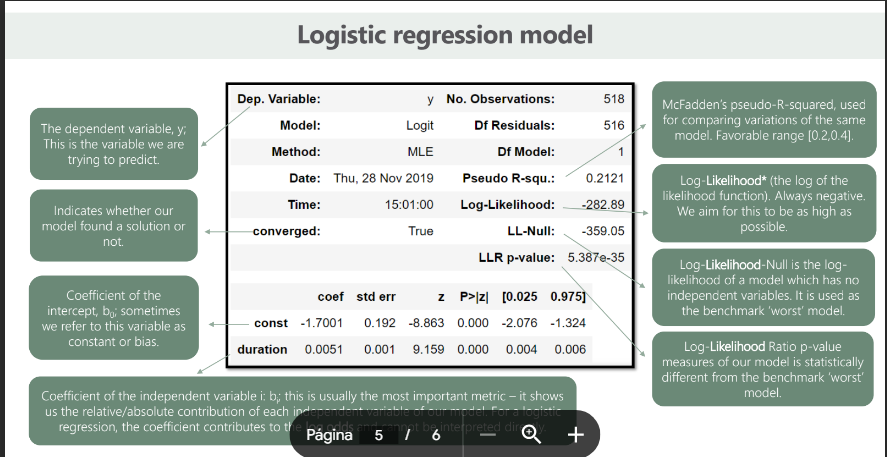

In [16]:
# Asumiendo que el dataset se llama train_df y que Churn es la variable objetivo
X = train_df_with_dummies[features]

# Agregamos una constante al modelo (para el intercepto)
X = sm.add_constant(X)

# Crear un DataFrame vacío para almacenar los valores de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

# Calcular el VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los resultados
print(vif_data)


                        Variable        VIF
0                          const  47.976677
1                     AccountAge   1.000085
2                 MonthlyCharges   1.000047
3              MultiDeviceAccess   1.000062
4            ViewingHoursPerWeek   1.000072
5         AverageViewingDuration   1.000049
6       ContentDownloadsPerMonth   1.000079
7                     UserRating   1.000101
8         SupportTicketsPerMonth   1.000050
9                  WatchlistSize   1.000075
10               ParentalControl   1.000036
11              SubtitlesEnabled   1.000079
12                Gender__Female   1.000103
13    DeviceRegistered__Computer   1.498578
14      DeviceRegistered__Mobile   1.497684
15          DeviceRegistered__TV   1.496210
16             ContentType__Both   1.336393
17         ContentType__TV Shows   1.336381
18       SubscriptionType__Basic   1.328075
19     SubscriptionType__Premium   1.328087
20  PaymentMethod__Bank transfer   1.495050
21    PaymentMethod__Credit card

In [18]:
from sklearn.metrics import accuracy_score

# Crear el modelo de regresión logística con Elastic Net
model_elastic = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1.0, solver='saga', max_iter=1000)

# Ajustar el modelo a los datos de entrenamiento
model_elastic.fit(train_df_scaler[features],train_df_with_dummies['Churn'])

# Predecir en los datos de prueba
y_pred_elastic = model_elastic.predict(test_df_with_dummies[features])

predicted_probaility = y_pred_elastic

prediction_df = pd.DataFrame({'CustomerID': test_df_with_dummies['CustomerID'], 'predicted_probability': predicted_probaility})
prediction_df

,CustomerID,predicted_probability
0,O1W6BHP6RM,0
1,LFR4X92X8H,0
2,QM5GBIYODA,0
3,D9RXTK2K9F,0
4,ENTCCHR1LR,0
...,...,...
104475,UTKREC613O,0
104476,MDB4E477PS,0
104477,IPDIA02ZE1,0
104478,ITLFTPRJGV,0


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

logistico_scores = cross_val_score(model_elastic, train_df_scaler[features], train_df_with_dummies['Churn'], cv=5, scoring='roc_auc')
logistic_perfomance = logistico_scores.mean()
print(logistic_perfomance)

0.7493833285126918


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [22]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [23]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [24]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [25]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [26]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# # This cell calculates the auc score and is hidden. Submit Assignment to see
# AUC score. %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission! %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission! %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission! %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission! %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission! %% [markdown] ## SUBMIT YOUR WORK! Once we are happy with our
# `prediction_df` and `prediction_submission.csv` we can now submit for
# autograding! Submit by using the blue **Submit Assignment** at the top of your
# notebook. Don't worry if your initial submission isn't perfect as you have
# multiple submission attempts and will obtain some feedback after each
# submission!

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!